## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer= keras.layers.Input([x_train.shape[-1]])
    x= keras.layers.Dense(units=512, activation='relu')(input_layer)
    x= keras.layers.Dense(units=256, activation='relu')(x)
    x= keras.layers.Dense(units=128, activation='relu')(x)
    x= keras.layers.Dense(units=64, activation='relu')(x)
    x= keras.layers.Dense(units=32, activation='relu')(x)
    x= keras.layers.Dense(units=16, activation='relu')(x)
    out= keras.layers.Dense(units=10, activation='softmax')(x)
    
    model= keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
____________________________________________

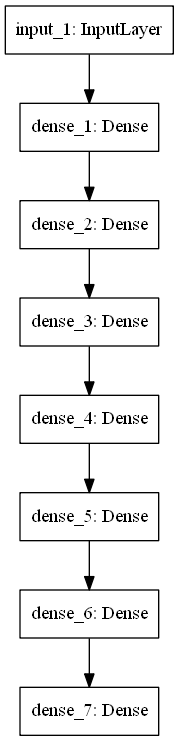

In [5]:
model= build_mlp()
model.summary()
from keras.utils import plot_model
plot_model(model=model, to_file='model.png')

In [9]:
opt= keras.optimizers.SGD(lr=0.1126, momentum=0.05, decay=0.0, nesterov=False)
model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [10]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.7886 - accuracy: 0.4246 - val_loss: 1.5947 - val_accuracy: 0.4582
Epoch 2/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.2204 - accuracy: 0.5757 - val_loss: 1.5616 - val_accuracy: 0.4827
Epoch 3/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.0589 - accuracy: 0.6279 - val_loss: 1.7876 - val_accuracy: 0.4716
Epoch 4/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.9935 - accuracy: 0.6511 - val_loss: 1.9847 - val_accuracy: 0.4522
Epoch 5/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.9468 - accuracy: 0.6670 - val_loss: 1.6934 - val_accuracy: 0.4843
Epoch 6/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.9129 - accuracy: 0.6785 - val_loss: 1.7075 - val_accuracy: 0.4844
Epoch 7/500
50000/50000 [==============================] - 2s 

Epoch 56/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.5829 - accuracy: 0.7968 - val_loss: 2.5084 - val_accuracy: 0.4531
Epoch 57/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.5850 - accuracy: 0.7939 - val_loss: 2.3388 - val_accuracy: 0.4538
Epoch 58/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.5774 - accuracy: 0.7996 - val_loss: 2.1966 - val_accuracy: 0.4956
Epoch 59/500
50000/50000 [==============================] - 2s 36us/step - loss: 0.5564 - accuracy: 0.8047 - val_loss: 2.1739 - val_accuracy: 0.4873
Epoch 60/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.5605 - accuracy: 0.8031 - val_loss: 2.3145 - val_accuracy: 0.4914
Epoch 61/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.5639 - accuracy: 0.8044 - val_loss: 2.4688 - val_accuracy: 0.4765
Epoch 62/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.5615 - accuracy: 0.8046

Epoch 111/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.4465 - accuracy: 0.8484 - val_loss: 2.7335 - val_accuracy: 0.4551
Epoch 112/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.4289 - accuracy: 0.8539 - val_loss: 2.7882 - val_accuracy: 0.4605
Epoch 113/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.4324 - accuracy: 0.8533 - val_loss: 2.5675 - val_accuracy: 0.4983
Epoch 114/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.4388 - accuracy: 0.8497 - val_loss: 2.7934 - val_accuracy: 0.4784
Epoch 115/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.4371 - accuracy: 0.8510 - val_loss: 2.6318 - val_accuracy: 0.4751
Epoch 116/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.3958 - accuracy: 0.8642 - val_loss: 2.7684 - val_accuracy: 0.4729
Epoch 117/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.4444 - accuracy:

50000/50000 [==============================] - 2s 35us/step - loss: 0.3334 - accuracy: 0.8884 - val_loss: 3.1177 - val_accuracy: 0.4742
Epoch 166/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.3520 - accuracy: 0.8812 - val_loss: 3.2874 - val_accuracy: 0.4725
Epoch 167/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.3242 - accuracy: 0.8902 - val_loss: 3.3357 - val_accuracy: 0.4948
Epoch 168/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.3400 - accuracy: 0.8867 - val_loss: 4.4919 - val_accuracy: 0.3917
Epoch 169/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.3558 - accuracy: 0.8853 - val_loss: 3.0823 - val_accuracy: 0.4710
Epoch 170/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.3250 - accuracy: 0.8896 - val_loss: 3.0322 - val_accuracy: 0.4887
Epoch 171/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.3297 - accuracy: 0.8932 - val_

Epoch 220/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2503 - accuracy: 0.9159 - val_loss: 3.5385 - val_accuracy: 0.4824
Epoch 221/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2689 - accuracy: 0.9103 - val_loss: 3.5446 - val_accuracy: 0.4767
Epoch 222/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2568 - accuracy: 0.9157 - val_loss: 3.4597 - val_accuracy: 0.4774
Epoch 223/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2773 - accuracy: 0.9094 - val_loss: 3.3935 - val_accuracy: 0.4764
Epoch 224/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2347 - accuracy: 0.9219 - val_loss: 3.6318 - val_accuracy: 0.4700
Epoch 225/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2508 - accuracy: 0.9185 - val_loss: 4.1392 - val_accuracy: 0.4739
Epoch 226/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.2807 - accuracy:

50000/50000 [==============================] - 2s 34us/step - loss: 0.2014 - accuracy: 0.9364 - val_loss: 3.8624 - val_accuracy: 0.4834
Epoch 275/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2200 - accuracy: 0.9283 - val_loss: 3.9190 - val_accuracy: 0.4745
Epoch 276/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2642 - accuracy: 0.9237 - val_loss: 3.7589 - val_accuracy: 0.4769
Epoch 277/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1990 - accuracy: 0.9364 - val_loss: 3.8555 - val_accuracy: 0.4771
Epoch 278/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.2298 - accuracy: 0.9293 - val_loss: 3.4216 - val_accuracy: 0.4873
Epoch 279/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2230 - accuracy: 0.9308 - val_loss: 4.2478 - val_accuracy: 0.4592
Epoch 280/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2004 - accuracy: 0.9358 - val_

Epoch 329/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1958 - accuracy: 0.9401 - val_loss: 3.5113 - val_accuracy: 0.4938
Epoch 330/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1677 - accuracy: 0.9488 - val_loss: 4.8924 - val_accuracy: 0.4438
Epoch 331/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.1581 - accuracy: 0.9507 - val_loss: 5.3339 - val_accuracy: 0.4671
Epoch 332/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2325 - accuracy: 0.9332 - val_loss: 3.8641 - val_accuracy: 0.4901
Epoch 333/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1488 - accuracy: 0.9519 - val_loss: 4.3522 - val_accuracy: 0.4699
Epoch 334/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1906 - accuracy: 0.9419 - val_loss: 4.1143 - val_accuracy: 0.4854
Epoch 335/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.1596 - accuracy:

50000/50000 [==============================] - 2s 34us/step - loss: 0.1667 - accuracy: 0.9487 - val_loss: 4.1481 - val_accuracy: 0.4881
Epoch 384/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1189 - accuracy: 0.9613 - val_loss: 4.7658 - val_accuracy: 0.4619
Epoch 385/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1621 - accuracy: 0.9532 - val_loss: 4.3140 - val_accuracy: 0.4607
Epoch 386/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1593 - accuracy: 0.9505 - val_loss: 4.2786 - val_accuracy: 0.4742
Epoch 387/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1450 - accuracy: 0.9578 - val_loss: 4.4943 - val_accuracy: 0.4824
Epoch 388/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1233 - accuracy: 0.9621 - val_loss: 4.6812 - val_accuracy: 0.4873
Epoch 389/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1335 - accuracy: 0.9618 - val_

Epoch 438/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1583 - accuracy: 0.9517 - val_loss: 3.9636 - val_accuracy: 0.4904
Epoch 439/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1139 - accuracy: 0.9668 - val_loss: 4.5395 - val_accuracy: 0.4860
Epoch 440/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.1150 - accuracy: 0.9640 - val_loss: 4.6614 - val_accuracy: 0.4835
Epoch 441/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1532 - accuracy: 0.9546 - val_loss: 4.2001 - val_accuracy: 0.4931
Epoch 442/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.1085 - accuracy: 0.9683 - val_loss: 4.1212 - val_accuracy: 0.4857
Epoch 443/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1305 - accuracy: 0.9594 - val_loss: 3.9282 - val_accuracy: 0.4835
Epoch 444/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.1327 - accuracy:

50000/50000 [==============================] - 2s 36us/step - loss: 0.1080 - accuracy: 0.9716 - val_loss: 3.3159 - val_accuracy: 0.4538
Epoch 493/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1211 - accuracy: 0.9664 - val_loss: 3.9296 - val_accuracy: 0.4691
Epoch 494/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0984 - accuracy: 0.9699 - val_loss: 5.4769 - val_accuracy: 0.4656
Epoch 495/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.1311 - accuracy: 0.9660 - val_loss: 4.5734 - val_accuracy: 0.4848
Epoch 496/500
50000/50000 [==============================] - 2s 36us/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 6.7017 - val_accuracy: 0.4238
Epoch 497/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.1200 - accuracy: 0.9697 - val_loss: 5.0831 - val_accuracy: 0.4898
Epoch 498/500
50000/50000 [==============================] - 2s 36us/step - loss: 0.0859 - accuracy: 0.9765 - val_

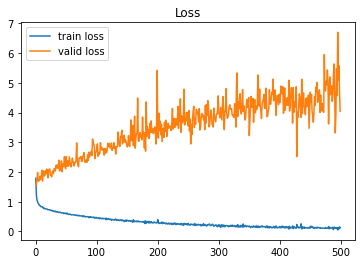

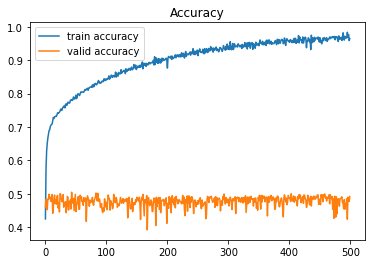

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()